# Predicting Housing Prices from California 1990 Census

## Fetching the data

In [6]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

In [13]:
download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path = os.curdir + os.path.join("datasets","housing")
housing_url = download_root + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=housing_url, housing_path=housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [14]:
fetch_housing_data()

In [15]:
def load_housing_data(housing_path=housing_path):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [16]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exploring the Data

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### Notice that total_bedrooms has less entries than the other columns

In [18]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


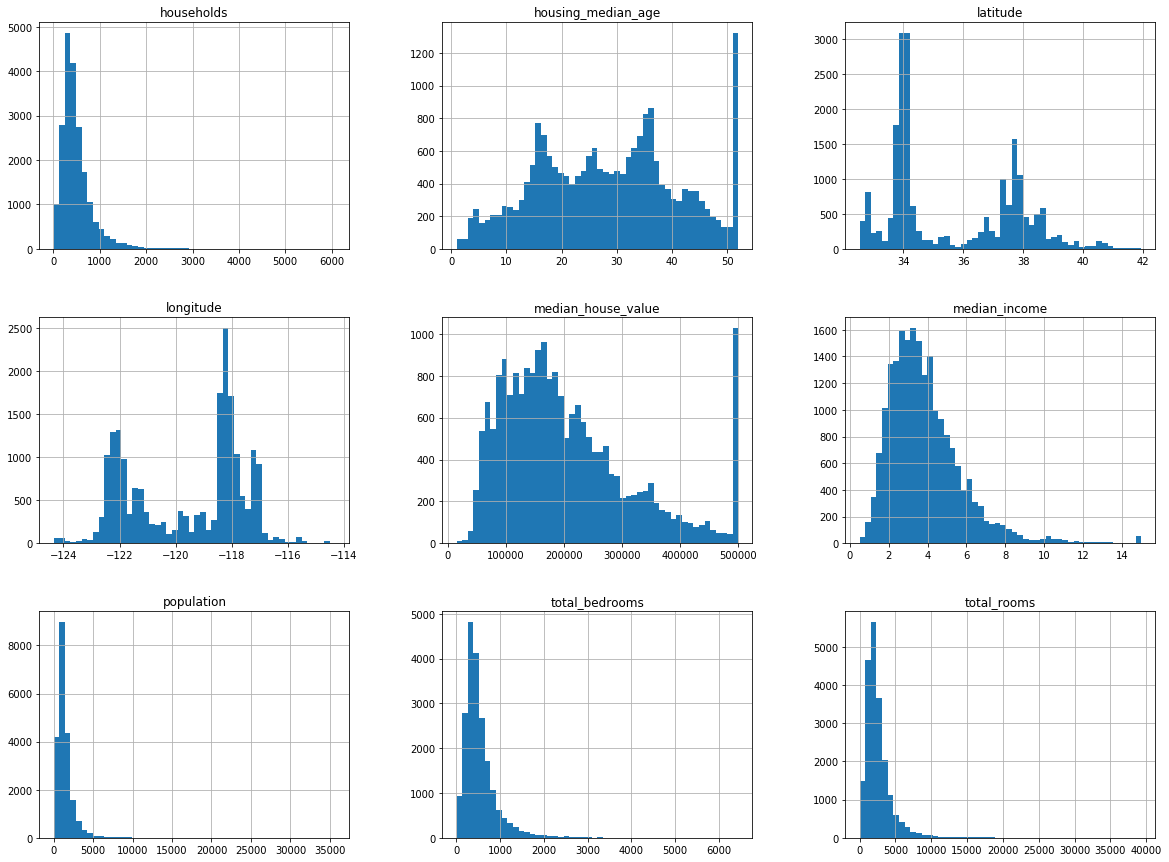

In [22]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

##### Looks like hard caps on median_income, housing_median_age, and housing_median_value

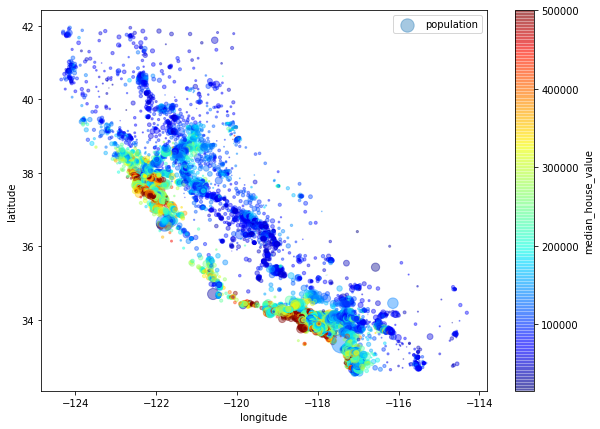

In [67]:

housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             alpha=0.4, 
             s=housing["population"]/100, 
             label="population",
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             figsize=(10,7),
             colorbar=True,
             sharex=False
             )
plt.legend()
plt.show()


In [68]:
corr_matrix = housing.corr()

In [69]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

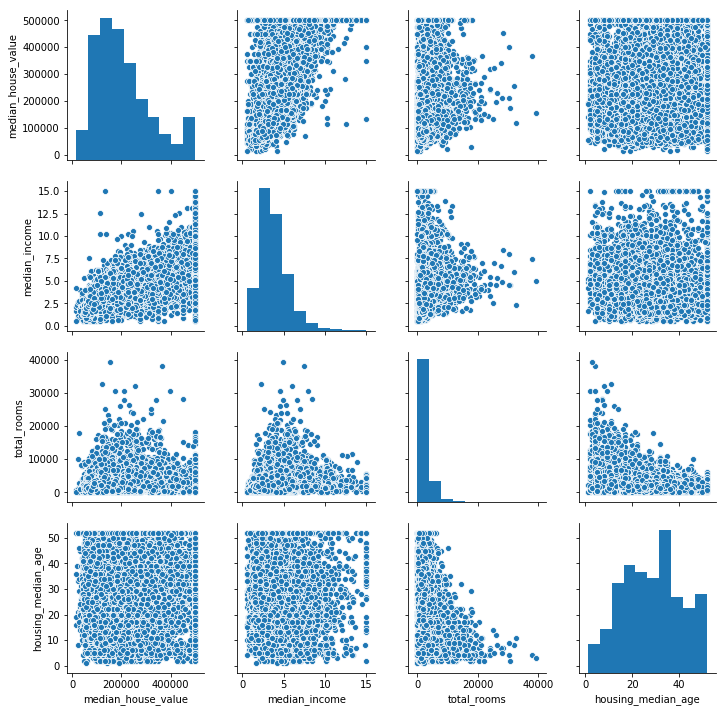

In [97]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
sns.pairplot(housing[attributes])

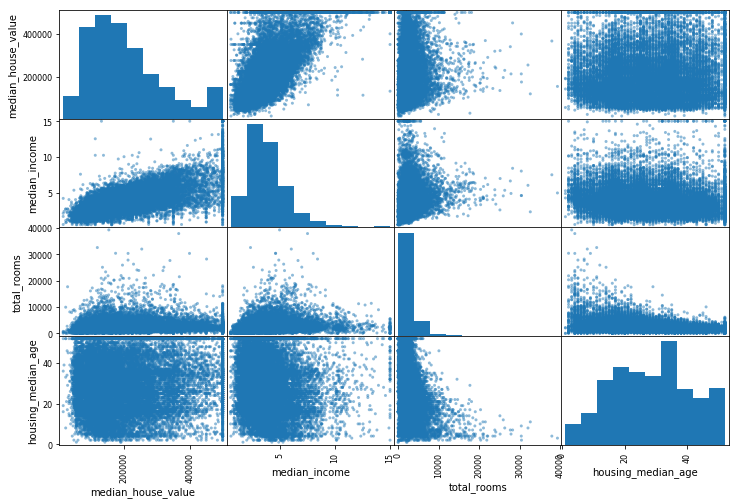

In [89]:
pd.plotting.scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

#### Making synthetic features

In [100]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [102]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

##### rooms_per_household and bedrooms_per_room are more correlated than other features that were used to make them

## Data Cleaning and Prepping

In [133]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [151]:
housing_raw = load_housing_data()
train_set, test_set = train_test_split(housing_raw, test_size=0.2, random_state=42)
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()
housing_num = housing.drop("ocean_proximity",axis=1)
housing_cat = housing["ocean_proximity"]

In [115]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories="auto")
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [119]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [120]:
from sklearn.base import BaseEstimator, TransformerMixin

#Creating a class to select numerical or categorical columns
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X , y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [154]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('cat_encoder',OneHotEncoder())
])

In [155]:
full_pipeline=FeatureUnion(transformer_list=[
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline),
])

In [156]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<16512x16 sparse matrix of type '<class 'numpy.float64'>'
	with 198144 stored elements in Compressed Sparse Row format>

In [157]:
housing_prepared.shape

(16512, 16)

## Selecting and training models

#### Starting with a simple linear regression model

In [159]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [160]:
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE on Training Set: ", lin_rmse)

lin_mae = mean_absolute_error(housing_labels,housing_predictions)
print("Lienar Regression Mean Absolute Error on Training Set: ", lin_mae)

Linear Regression RMSE on Training Set:  67593.20745775253
Lienar Regression Mean Absolute Error on Training Set:  48785.160006140286


#### Making a Decision Tree model

In [163]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [165]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error (housing_labels, housing_predictions)
print("Decision Tree RMSE on Training Set: ", tree_rmse)

Decision Tree RMSE on Training Set:  0.0


We have obviously overfit on the training set with the decision tree.  Let's see how bad using cross-validation

In [167]:
def display_scores(scores):
    print("Scores:", scores),
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [172]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [173]:
display_scores(tree_rmse_scores)

Scores: [65789.83275999 70456.0943439  69481.14035631 71826.10057522
 74278.74806249 66946.02726259 65881.16130803 69150.78611725
 65707.70137804 70075.38991165]
Mean:  68959.29820754607
Standard Deviation:  2728.6760273614855


In [175]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [65000.67382874 70960.56056817 67122.63935175 66089.63153612
 68402.54686485 65266.34734544 65218.78172129 68525.4698187
 72739.87538562 68957.34112183]
Mean:  67828.38675425074
Standard Deviation:  2468.0913643177005


Linear Regressor actually does better than the Decision Tree

### Making and optimizing a Random Forest Regressor

In [177]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [179]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
print("Random Forest RMSE on Training Set: ", forest_rmse)

Random Forest RMSE on Training Set:  22075.41896635054


In [180]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50616.63571439 54234.84983277 52096.32147858 53965.05365945
 55440.08961217 49281.96105975 49033.39661097 52589.03627997
 52739.02762374 52290.94985604]
Mean:  52228.73217278224
Standard Deviation:  1981.318890021966


###### How much better can this model get? Let's do some hyperparameter searching

In [182]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()
forest_grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

%time forest_grid_search.fit(housing_prepared, housing_labels)

CPU times: user 4min 24s, sys: 2.06 s, total: 4min 26s
Wall time: 4min 31s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [183]:
forest_grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [185]:
cvres = forest_grid_search.cv_results_
for mean_score, params in (zip(cvres["mean_test_score"],cvres["params"])):
    print(np.sqrt(-mean_score),params)

63210.14048219495 {'max_features': 2, 'n_estimators': 3}
54966.15963618951 {'max_features': 2, 'n_estimators': 10}
52534.250563204056 {'max_features': 2, 'n_estimators': 30}
60494.73761055682 {'max_features': 4, 'n_estimators': 3}
52674.51463872037 {'max_features': 4, 'n_estimators': 10}
50271.055118140626 {'max_features': 4, 'n_estimators': 30}
58369.49314262759 {'max_features': 6, 'n_estimators': 3}
52132.114830218736 {'max_features': 6, 'n_estimators': 10}
49684.648312461926 {'max_features': 6, 'n_estimators': 30}
58102.06109680349 {'max_features': 8, 'n_estimators': 3}
51777.54982732642 {'max_features': 8, 'n_estimators': 10}
50033.35581703397 {'max_features': 8, 'n_estimators': 30}
61516.24088069642 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54328.4608469541 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59162.896153378744 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52168.66293469397 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [202]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators':randint(20,100), 
    'max_features':randint(6,16),
    'criterion':["mae","mse"]
}

forest_reg = RandomForestRegressor()
forest_grid_search_rndm = RandomizedSearchCV(forest_reg, n_iter=5, param_distributions = param_dist,
                                             cv=5, scoring='neg_mean_squared_error', verbose = 2,
                                             n_jobs=3, return_train_score=True)

forest_grid_search_rndm.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed: 127.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=3,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2c85c160>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2c85c278>, 'criterion': ['mae', 'mse']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

In [206]:
cvres = forest_grid_search_rndm.cv_results_
for mean_score, params in (zip(cvres["mean_test_score"],cvres["params"])):
    print(np.sqrt(-mean_score),params)

50119.09102860904 {'criterion': 'mae', 'max_features': 10, 'n_estimators': 39}
49145.83096901838 {'criterion': 'mse', 'max_features': 6, 'n_estimators': 76}
49806.95191903306 {'criterion': 'mse', 'max_features': 11, 'n_estimators': 47}
49850.49468873817 {'criterion': 'mae', 'max_features': 10, 'n_estimators': 66}
49743.08846397818 {'criterion': 'mae', 'max_features': 10, 'n_estimators': 68}


In [212]:
feature_importances = forest_grid_search_rndm.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_household","population_per_household","bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [213]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3405919246341873, 'median_income'),
 (0.14399958258277346, 'INLAND'),
 (0.10804244178301303, 'population_per_household'),
 (0.08720108736811605, 'bedrooms_per_room'),
 (0.07266086896231146, 'longitude'),
 (0.06674737802979376, 'latitude'),
 (0.05332103394762424, 'rooms_per_household'),
 (0.04265536118916408, 'housing_median_age'),
 (0.01720004755767961, 'population'),
 (0.016907085859988482, 'total_rooms'),
 (0.016347547015446127, 'total_bedrooms'),
 (0.015507338954232142, 'households'),
 (0.010983636465642273, '<1H OCEAN'),
 (0.004669007942797964, 'NEAR OCEAN'),
 (0.0030270477508138106, 'NEAR BAY'),
 (0.00013860995641636376, 'ISLAND')]

### Making and optimizing a Support Vector Machine

In [197]:
from sklearn.svm import SVR
from scipy.stats import expon, reciprocal

param_distribs = {
    'kernel':['linear','rbf'],
    'C':reciprocal(20,200000),
    'gamma':expon(scale=1.0),
}

svm_reg = SVR()
svm_rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs, n_iter=10,cv=5, 
                                    scoring='neg_mean_squared_error',
                                    verbose=2,n_jobs=3, return_train_score=True)

svm_rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  4.8min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  8.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=3,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2c857710>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2c857d68>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [198]:
svm_rnd_search.best_estimator_

SVR(C=68528.09739761388, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.5834399981692919, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [199]:
cvres = svm_rnd_search.cv_results_
for mean_score, params in (zip(cvres["mean_test_score"],cvres["params"])):
    print(np.sqrt(-mean_score),params)

80913.57076215219 {'C': 2246.41927311277, 'gamma': 0.5327835689931285, 'kernel': 'rbf'}
73636.03894238635 {'C': 1862.6935960265494, 'gamma': 0.28399696999437046, 'kernel': 'rbf'}
69201.882312945 {'C': 833.8984987483518, 'gamma': 0.8987416218215359, 'kernel': 'linear'}
105013.05294545651 {'C': 546.96995754784, 'gamma': 0.8988213426850785, 'kernel': 'rbf'}
63462.95390087535 {'C': 8119.382060750594, 'gamma': 0.37418166289404964, 'kernel': 'rbf'}
69699.46678212496 {'C': 215.55779204158523, 'gamma': 1.0692573845171027, 'kernel': 'linear'}
82926.44849395007 {'C': 4515.236772540386, 'gamma': 0.9130808393460111, 'kernel': 'rbf'}
68996.22175490453 {'C': 151465.65804017405, 'gamma': 0.6047509221647378, 'kernel': 'linear'}
56938.80324421773 {'C': 68528.09739761388, 'gamma': 0.5834399981692919, 'kernel': 'rbf'}
75873.90363466939 {'C': 2399.527822226191, 'gamma': 0.41098507980516663, 'kernel': 'rbf'}


#### Adding a transformer in the preparation pipeline to select only the most important attributes

In [224]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr,k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:,self.feature_indices_]

In [225]:
#looking at the top 5 attributes and their indices
k = 5
top_k_indices = indices_of_top_k(feature_importances,k)
top_attribs = np.array(attributes)[top_k_indices]
top_importances = feature_importances[top_k_indices]

sorted(zip(top_importances, top_attribs, top_k_indices), reverse=True)

[(0.3405919246341873, 'median_income', 7),
 (0.14399958258277346, 'INLAND', 12),
 (0.10804244178301303, 'population_per_household', 9),
 (0.08720108736811605, 'bedrooms_per_room', 10),
 (0.07266086896231146, 'longitude', 0)]

In [231]:
# Adding the feature selector and svm predictor to the pipeline
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection',TopFeatureSelector(feature_importances, k)),
    ('svm_reg',SVR(**svm_rnd_search.best_params_))
])

In [232]:
%time prepare_select_and_predict_pipeline.fit(housing, housing_labels)

CPU times: user 11.5 s, sys: 321 ms, total: 11.8 s
Wall time: 12.3 s


Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=None,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])),...  gamma=0.5834399981692919, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

In [233]:
housing_predictions =  prepare_select_and_predict_pipeline.predict(housing)
svm_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
print("SVM RMSE on Training Set: ", svm_rmse)

SVM RMSE on Training Set:  61891.12802769255


##### SVM does not do as well as the Random Forest algorithm, but does do better than the linear regressor.  Let's see how much changing the number of features used makes a difference.

In [237]:
param_grid = [
    {'feature_selection__k':[5,6,7,8,9,10]}
]

grid_search_features_svm = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv = 5,
                                        scoring="neg_mean_squared_error", verbose = 2, n_jobs=2, 
                                        return_train_score=True,)
grid_search_features_svm.fit(housing, housing_labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  6.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=None,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])),...  gamma=0.5834399981692919, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'feature_selection__k': [5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=2)

In [238]:
cvres = grid_search_features_svm.cv_results_
for mean_score, params in (zip(cvres["mean_test_score"],cvres["params"])):
    print(np.sqrt(-mean_score),params)

62837.74395348226 {'feature_selection__k': 5}
59111.214493120075 {'feature_selection__k': 6}
58591.53510818345 {'feature_selection__k': 7}
56797.55507571686 {'feature_selection__k': 8}
57472.96107902747 {'feature_selection__k': 9}
55780.63650402251 {'feature_selection__k': 10}


#### Interesting that 8 features performes better than 9, but 10 performs better than 8... Apparently feature importances from the random forest algorithm are not the imporant features for SVM?

## What Have We Accomplished?

1. Imported housing data from 1990 California Census Data
2. Briefly Visualized and explored the data
3. Split the data into training and test sets and developed pipelines to impute missing values and format for input into ML models
4. Fit the data with linear regression, random forest, and support vector machine algorithms to predict housing prices.
5. Performed hyperparameter searches using random and preset parameter grids
6. More improvement is possible, but RMSE on our predictions is ~ $50-60k.  Is this good enough for the client's purposes?